# Project "Sentiment Analysis in Roman Urdu"

## The liberaries we're going to use in our project

In [3]:
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For natural language processing tasks
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# For machine learning algorithms and tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import plotly.express as px
import re

In [4]:
!pip install wordcloud

## 1 Data Collection

In [5]:
dataset = pd.read_csv("Roman Urdu DataSet.csv")

In [6]:
import os
import string

In [7]:
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\user


In [8]:
dataset.head()

,Tweets,sentiments
0,Aakhirkar is wusat-e-beyan ka intezam bhi khud...,Positive
1,Aala taleem ke liye Cambridge gae to angrezi s...,Positive
2,Lekin is tarha ke kitne waqeaat honge jo manza...,Positive
3,Question: Guzishta arse Deal Stain ne musalsal...,Negative
4,Retire hone ka bawajud cricket se Javed Miand...,Positive


## 2 Step : Pre-processing

###### Data Cleaning :

###### Missing Value Management

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load dataset
dataset = pd.read_csv("Roman Urdu DataSet.csv")

# Step 1: Identify missing values
missing_values = dataset.isnull().sum()
print("Missing values in each column:")
print(missing_values)



Missing values in each column:
Tweets        0
sentiments    0
dtype: int64


###### Change into lower case

In [10]:
dataset[['Tweets', 'sentiments']] = dataset[['Tweets', 'sentiments']].apply(lambda x: x.str.lower())
print(dataset.head())

                                              Tweets sentiments
0  aakhirkar is wusat-e-beyan ka intezam bhi khud...   positive
1  aala taleem ke liye cambridge gae to angrezi s...   positive
2  lekin is tarha ke kitne waqeaat honge jo manza...   positive
3  question: guzishta arse deal stain ne musalsal...   negative
4  retire hone ka bawajud cricket  se javed miand...   positive


###### Duplicate values

In [11]:
# Step 1: Identify duplicate values
duplicate_rows = dataset.duplicated()

# Step 2: Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Step 3: Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)


Number of duplicate rows: 214


###### Handling Duplicate values

In [12]:
# Step 1: Remove duplicate rows
dataset.drop_duplicates(inplace=True)

# Step 2: Check if duplicate rows are removed
print("Number of duplicate rows after removal:", dataset.duplicated().sum())

# Step 3: Optionally, reset the index
dataset.reset_index(drop=True, inplace=True)


Number of duplicate rows after removal: 0


###### Outliers

###### Punctuation Removal

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [15]:
dataset['Tweets'] = dataset['Tweets'].apply(lambda x: remove_punctuations(x))
dataset.head()

,Tweets,sentiments
0,aakhirkar is wusatebeyan ka intezam bhi khud b...,positive
1,aala taleem ke liye cambridge gae to angrezi s...,positive
2,lekin is tarha ke kitne waqeaat honge jo manza...,positive
3,question guzishta arse deal stain ne musalsal ...,negative
4,retire hone ka bawajud cricket se javed miand...,positive


###### Stop Word Handling

In [16]:
import nltk
from nltk.tokenize import word_tokenize

# Download the punkt tokenizer if you haven't already
nltk.download('punkt')

custom_stopwords = [
        "ai", "ayi", "hy", "hai", "main", "ki", "tha", "koi", "ko", "ke",  "sy", "woh", 
        "bhi", "aur", "wo", "yeh", "rha", "hota", "ho", "ga", "ka", "le", "lia", "lye", 
        "kr", "kar", "lye", "liye", "hotay", "waisay", "gya", "gaya", "kch", "ab",
        "thy", "thay", "houn", "hain", "han", "to", "is", "hi", "jo", "kya", "thi",
        "se", "pe", "phr", "wala", "waisay", "us", "na", "ny", "hun", "rha", "raha",
        "ja", "rahay", "abi", "uski", "ne", "haan", "acha", "nai", "sent", "photo", 
        "you", "kafi", "gai", "rhy", "kuch", "jata", "aye", "ya", "dono", "hoa", 
        "aese", "de", "wohi", "jati", "jb", "krta", "lg", "rahi", "hui", "karna", 
        "krna", "gi", "hova", "yehi", "jana", "jye", "chal", "mil", "tu", "hum", "par", 
        "hay", "kis", "sb", "gy", "dain", "krny", "tou","kabil", "kareeb", "ooper", "bahar", "mutabiq", "mutabiqan", "cross", "haqeeqatan", "sifat", "baad",
        "baad mein", "dobarah", "khilaaf", "peechay", "pehle", "nahi hai", "sab", "izazat", "izazat deta hai",
        "qareeb qareeb", "akela", "sath", "sath", "pehle se", "bhi", "haalaankay", "har waqt", "main hoon",
        "darmiyan", "beech mein", "beech mein", "ek", "aur", "doosra", "koi", "koi bhi", "kaise bhi", "koi bhi",
        "kuch bhi", "kisi bhi soorat mein", "har jaga", "alag", "nazar aana", "qadr karna", "munasib", "hain",
        "nahin", "aas paas", "jaise", "a's", "alag", "pooch", "poochta hai", "juda", "haazir", "door", "bahut hi",
        "wapas", "peechay", "peeche", "hoti hai", "hosakti hai", "ho sakta hai", "hoti hai", "ho gaya", "ho gaya",
        "chhat", "karan", "karan", "lia", "lia", "gaya", "mila", "hona", "hote hain", "kuch", "kuch bhi",
        "kaise bhi", "aese", "dene", "wohi", "jaati hai", "jab", "karta hai", "laga", "rahi hai", "hui", "karna",
        "karna", "gi", "hua", "yahi", "jaana", "jaye", "chalo", "mila", "tu", "hum", "par", "hai", "kis", "sab",
        "gaye", "dain", "karne", "to"
    ]

# Example text
text = "Wo sb humary ghr ai to hum mily"

# Tokenize the text into words
words = word_tokenize(text)

# Filter out the custom stopwords
filtered_words = [word for word in words if word.lower() not in custom_stopwords]

# Join the remaining words back into sentences
filtered_text = ' '.join(filtered_words)

print("Original Text:", text)
print("Text after removing custom stopwords:", filtered_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original Text: Wo sb humary ghr ai to hum mily
Text after removing custom stopwords: humary ghr mily


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=custom_stopwords)
print(dataset)

                                                  Tweets sentiments
0      aakhirkar is wusatebeyan ka intezam bhi khud b...   positive
1      aala taleem ke liye cambridge gae to angrezi s...   positive
2      lekin is tarha ke kitne waqeaat honge jo manza...   positive
3      question guzishta arse deal stain ne musalsal ...   negative
4      retire hone ka bawajud cricket  se javed miand...   positive
...                                                  ...        ...
11006  zulfiqar ali bhutto ki shakhsiyat agarcha un k...   negative
11007  zulfiqar ali bhutto ki shakhsiyat atni bhar pu...   positive
11008                     zulm sirf america main hi nhn    negative
11009  zunair khawaja apki izat majroh krna naichahta...   negative
11010                    zyda tu kuch ni bs kuch he hrha   negative

[11011 rows x 2 columns]


In [18]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(filtered_words)

In [19]:
dataset['Tweets'] = dataset['Tweets'].apply(remove_stopwords)
dataset.head()

,Tweets,sentiments
0,aakhirkar wusatebeyan intezam khud bukhari sah...,positive
1,aala taleem cambridge gae angrezi sheyroadab a...,positive
2,lekin tarha kitne waqeaat honge manzareaam nah...,positive
3,question guzishta arse deal stain musalsal kai...,negative
4,retire hone bawajud cricket javed miandad talu...,positive


###### Handling Repeated Words

In [20]:
def remove_repeated_words(text):
    words = text.split()
    unique_words = []
    for word in words:
        if word not in unique_words:
            unique_words.append(word)
    return ' '.join(unique_words)

In [21]:
dataset['Tweets'] = dataset['Tweets'].apply(remove_repeated_words)
dataset.head()

,Tweets,sentiments
0,aakhirkar wusatebeyan intezam khud bukhari sah...,positive
1,aala taleem cambridge gae angrezi sheyroadab a...,positive
2,lekin tarha kitne waqeaat honge manzareaam nah...,positive
3,question guzishta arse deal stain musalsal kai...,negative
4,retire hone bawajud cricket javed miandad talu...,positive


In [22]:
print(type(dataset))
print(dataset)


<class 'pandas.core.frame.DataFrame'>
                                                  Tweets sentiments
0      aakhirkar wusatebeyan intezam khud bukhari sah...   positive
1      aala taleem cambridge gae angrezi sheyroadab a...   positive
2      lekin tarha kitne waqeaat honge manzareaam nah...   positive
3      question guzishta arse deal stain musalsal kai...   negative
4      retire hone bawajud cricket javed miandad talu...   positive
...                                                  ...        ...
11006  zulfiqar ali bhutto shakhsiyat agarcha un siya...   negative
11007  zulfiqar ali bhutto shakhsiyat atni bhar pur h...   positive
11008                              zulm sirf america nhn   negative
11009  zunair khawaja apki izat majroh naichahta wrna...   negative
11010                                 zyda ni bs he hrha   negative

[11011 rows x 2 columns]


###### Noisy Data

In [23]:
dataset.drop_duplicates(inplace=True)

In [24]:
# Check existing column names
print(dataset.columns)

Index(['Tweets', 'sentiments'], dtype='object')


In [25]:
def clean_text(text):
    text = re.sub(r'<[^>]*>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)   # Remove punctuation
    text = text.lower()                   # Convert text to lowercase
    # Other cleaning steps...
    return text  # Properly aligned with the previous lines

dataset['cleaned_text'] = dataset['Tweets'].apply(clean_text)

In [26]:
import re

# Example text with special characters
text = "aakhirkar is wusat-e-beyan ka intezam bhi khud bukhari sahib he ne kar diya aur 1962 mein Fazal Ahmed Kareem fazli ki film Ã¢â‚¬Å“ Chiragh Jalta Raha Ã¢â‚¬Â mein Mohammed Ali ko kaam dilwaya"

# Remove special characters using regular expressions
clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

print("Original Text:", text)
print("Text after removing special characters:", clean_text)


Original Text: aakhirkar is wusat-e-beyan ka intezam bhi khud bukhari sahib he ne kar diya aur 1962 mein Fazal Ahmed Kareem fazli ki film Ã¢â‚¬Å“ Chiragh Jalta Raha Ã¢â‚¬Â mein Mohammed Ali ko kaam dilwaya
Text after removing special characters: aakhirkar is wusatebeyan ka intezam bhi khud bukhari sahib he ne kar diya aur 1962 mein Fazal Ahmed Kareem fazli ki film  Chiragh Jalta Raha  mein Mohammed Ali ko kaam dilwaya


In [28]:
# Import necessary library
import pandas as pd

# Load the dataset
dataset = pd.read_csv("Roman Urdu DataSet.csv")

# Convert sentiments to lowercase to ensure consistency
dataset['sentiments'] = dataset['sentiments'].str.lower()

# Count positive and negative comments
positive_count = dataset[dataset['sentiments'] == 'positive'].shape[0]
negative_count = dataset[dataset['sentiments'] == 'negative'].shape[0]

print(f"Number of positive comments: {positive_count}")
print(f"Number of negative comments: {negative_count}")


Number of positive comments: 5960
Number of negative comments: 5249


## 3. Feature Extraction

##### TF-IDF Method

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to TF-IDF feature matrix
tfidf_features = tfidf_vectorizer.fit_transform(dataset['Tweets'])

# Get the feature names (words) from the TfidfVectorizer
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the TF-IDF feature matrix and feature names
print("TF-IDF Feature Matrix:")
print(tfidf_features)
print("\nFeature Names:")
print(tfidf_feature_names)

TF-IDF Feature Matrix:
  (0, 6192)	0.26448232768815716
  (0, 11168)	0.1387364479604611
  (0, 12652)	0.07310464469922538
  (0, 1336)	0.14944983803375175
  (0, 15207)	0.1940582644672439
  (0, 18823)	0.13258160193514745
  (0, 10526)	0.2533497490568412
  (0, 4793)	0.23932435868478275
  (0, 7348)	0.1466821122370303
  (0, 12489)	0.06525112880653249
  (0, 7266)	0.2533497490568412
  (0, 11522)	0.20415463268134035
  (0, 1064)	0.18024489304235503
  (0, 7263)	0.22318590155343282
  (0, 14856)	0.1567237182936322
  (0, 127)	0.22318590155343282
  (0, 2076)	0.07949374570627331
  (0, 6262)	0.13944963915518616
  (0, 11456)	0.10186081206527793
  (0, 16475)	0.08866376314484811
  (0, 8995)	0.11244752147982813
  (0, 19825)	0.18669272335163484
  (0, 4151)	0.22318590155343282
  (0, 12369)	0.14218235529817008
  (0, 3576)	0.09285453534281014
  :	:
  (11223, 12813)	0.17965634260128607
  (11223, 523)	0.1747414850014316
  (11223, 12793)	0.15257198508766293
  (11223, 10752)	0.15742302334567584
  (11223, 14056)	0.22

##### Tri-Gram (3-Gram) Method

In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
dataset = pd.read_csv("Roman Urdu DataSet.csv")

# Ensure the Tweets column is in string format
dataset['Tweets'] = dataset['Tweets'].astype(str)

# Convert the text to lowercase
dataset['Tweets'] = dataset['Tweets'].str.lower()

# Function to perform TF-IDF feature extraction
def tfidf_feature_extraction(text_data):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(text_data)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    return tfidf_df

# Function to perform tri-gram feature extraction
def trigram_feature_extraction(text_data):
    vectorizer = TfidfVectorizer(ngram_range=(3, 3))
    trigram_matrix = vectorizer.fit_transform(text_data)
    trigram_df = pd.DataFrame(trigram_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    return trigram_df

# Perform TF-IDF feature extraction
tfidf_features = tfidf_feature_extraction(dataset['Tweets'])
print("TF-IDF Features:")
print(tfidf_features.head())

# Perform tri-gram feature extraction
trigram_features = trigram_feature_extraction(dataset['Tweets'])
print("\nTri-gram Features:")
print(trigram_features.head())


TF-IDF Features:
    00  000  0300  03004328290  0300929358603339293586  03097065975   04  \
0  0.0  0.0   0.0          0.0                     0.0          0.0  0.0   
1  0.0  0.0   0.0          0.0                     0.0          0.0  0.0   
2  0.0  0.0   0.0          0.0                     0.0          0.0  0.0   
3  0.0  0.0   0.0          0.0                     0.0          0.0  0.0   
4  0.0  0.0   0.0          0.0                     0.0          0.0  0.0   

   0esa   0r   10  ...  جیڑی   سی  ناں   کر  کردی  ھاں  砥nchahe  賭easar   鄭h  \
0   0.0  0.0  0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0      0.0     0.0  0.0   
1   0.0  0.0  0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0      0.0     0.0  0.0   
2   0.0  0.0  0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0      0.0     0.0  0.0   
3   0.0  0.0  0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0      0.0     0.0  0.0   
4   0.0  0.0  0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0      0.0     0.0  0.0   

   鄭pwa  
0   0.0  
1   0.0  
2   0.0  
3   0

## Data Splitting

In [34]:
from sklearn.model_selection import train_test_split

# Define features and labels
X = tfidf_features  # Assuming tfidf_features contains the extracted features
y = dataset['sentiments']  # Assuming 'sentiments' column contains the labels

# Split the data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print("Training set - Features:", X_train.shape)
print("Training set - Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape)
print("Testing set - Labels:", y_test.shape)


Training set - Features: (8418, 24733)
Training set - Labels: (8418,)
Testing set - Features: (2807, 24733)
Testing set - Labels: (2807,)


## 4. Naive Bayes Multinomial Model (Training & Testing)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Filter the dataset to remove instances with neutral sentiment
filtered_dataset = dataset[dataset['sentiments'] != 'Neutral']

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Extract features from filtered dataset
tfidf_features = tfidf_vectorizer.fit_transform(filtered_dataset['Tweets'])

# Split the filtered data into training and testing sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, filtered_dataset['sentiments'], test_size=0.25, random_state=42)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

# Calculate and print precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7763110952550838

Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.69      0.74      1309
    Positive       0.76      0.86      0.80      1494

    accuracy                           0.78      2803
   macro avg       0.78      0.77      0.77      2803
weighted avg       0.78      0.78      0.77      2803


Precision: 0.7797507883466895
Recall: 0.7763110952550838
F1 Score: 0.774161916205892


In [76]:
# Make predictions on the testing dataset
y_pred = model.predict(X_test)

# Calculate the number of correct predictions
nb_correct_predictions = (y_test == y_pred).sum()

# Calculate the total number of predictions
nb_total_predictions = len(y_test)

# Calculate the error rate
nb_error_rate = 1 - (nb_correct_predictions / nb_total_predictions)
nb_error_rate = nb_error_rate *100
# Print the results
print("Total predictions:", nb_total_predictions)
print("Number of correct predictions (Naive Bayes):", nb_correct_predictions)
print("Error rate (Naive Bayes):", nb_error_rate,"%")


Total predictions: 2803
Number of correct predictions (Naive Bayes): 2176
Error rate (Naive Bayes): 22.36889047449162 %


## Random Tree Model (Training & Testing)

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the testing dataset
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model's performance
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

# Print the evaluation metrics for Random Forest model
print("Random Forest Model Accuracy:", rf_accuracy)
print("\nRandom Forest Model Classification Report:")
print(rf_report)

# Calculate and print precision, recall, and F1-score for Random Forest model
rf_precision = precision_score(y_test, rf_y_pred, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, rf_y_pred, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted', zero_division=1)

print("\nRandom Forest Model Precision:", rf_precision)
print("Random Forest Model Recall:", rf_recall)
print("Random Forest Model F1 Score:", rf_f1)


Random Forest Model Accuracy: 0.7431323581876561

Random Forest Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.76      0.73      1309
    Positive       0.78      0.73      0.75      1494

    accuracy                           0.74      2803
   macro avg       0.74      0.74      0.74      2803
weighted avg       0.75      0.74      0.74      2803


Random Forest Model Precision: 0.7454344228923696
Random Forest Model Recall: 0.7431323581876561
Random Forest Model F1 Score: 0.7434119745016671


In [77]:
# Make predictions on the testing dataset
rf_y_pred = rf_model.predict(X_test)

# Calculate the number of correct predictions
rf_correct_predictions = (y_test == rf_y_pred).sum()

# Calculate the total number of predictions
rf_total_predictions = len(y_test)

# Calculate the error rate
rf_error_rate = 1 - (rf_correct_predictions / rf_total_predictions)
rf_error_rate = rf_error_rate*100
# Print the results
print("Total predictions :", rf_total_predictions)
print("Number of correct predictions (Random Forest):", rf_correct_predictions)
print("Error rate (Random Forest):", rf_error_rate,"%")


Total predictions : 2803
Number of correct predictions (Random Forest): 2083
Error rate (Random Forest): 25.686764181234388 %


## Decision Tree Model (Training & Testing)

In [64]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Make predictions on the testing dataset
dt_y_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model's performance
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)

# Print the evaluation metrics for Decision Tree model
print("Decision Tree Model Accuracy:", dt_accuracy)
print("\nDecision Tree Model Classification Report:")
print(dt_report)

# Calculate and print precision, recall, and F1-score for Decision Tree model
dt_precision = precision_score(y_test, dt_y_pred, average='weighted', zero_division=1)
dt_recall = recall_score(y_test, dt_y_pred, average='weighted', zero_division=1)
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted', zero_division=1)

print("\nDecision Tree Model Precision:", dt_precision)
print("Decision Tree Model Recall:", dt_recall)
print("Decision Tree Model F1 Score:", dt_f1)


Decision Tree Model Accuracy: 0.6767748840528006

Decision Tree Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.65      0.67      0.66      1309
    Positive       0.70      0.68      0.69      1494

    accuracy                           0.68      2803
   macro avg       0.68      0.68      0.68      2803
weighted avg       0.68      0.68      0.68      2803


Decision Tree Model Precision: 0.6774843356705218
Decision Tree Model Recall: 0.6767748840528006
Decision Tree Model F1 Score: 0.6770053230330029


In [75]:
# Make predictions on the testing dataset
dt_y_pred = dt_model.predict(X_test)

# Calculate the number of correct predictions
dt_correct_predictions = (y_test == dt_y_pred).sum()

# Calculate the total number of predictions
dt_total_predictions = len(y_test)

# Calculate the error rate
dt_error_rate = 1 - (dt_correct_predictions / dt_total_predictions)
dt_error_rate = dt_error_rate * 100
# Print the results
print("Total predictions:", dt_total_predictions)
print("Number of correct predictions (Decision Tree):", dt_correct_predictions)
print("Error rate (Decision Tree):", dt_error_rate,"%")


Total predictions: 2803
Number of correct predictions (Decision Tree): 1897
Error rate (Decision Tree): 32.32251159471994 %


## RBF Kernel

In [67]:
from sklearn.svm import SVC

# Initialize SVM classifier with RBF kernel
svm_model_rbf = SVC(kernel='rbf', random_state=42)

# Train the SVM model with RBF kernel
svm_model_rbf.fit(X_train, y_train)

# Make predictions on the testing dataset
svm_y_pred_rbf = svm_model_rbf.predict(X_test)

# Evaluate the SVM model with RBF kernel's performance
svm_accuracy_rbf = accuracy_score(y_test, svm_y_pred_rbf)
svm_report_rbf = classification_report(y_test, svm_y_pred_rbf)

# Print the evaluation metrics for SVM model with RBF kernel
print("SVM Model with RBF Kernel Accuracy:", svm_accuracy_rbf)
print("\nSVM Model with RBF Kernel Classification Report:")
print(svm_report_rbf)

# Calculate and print precision, recall, and F1-score for SVM model with RBF kernel
svm_precision_rbf = precision_score(y_test, svm_y_pred_rbf, average='weighted', zero_division=1)
svm_recall_rbf = recall_score(y_test, svm_y_pred_rbf, average='weighted', zero_division=1)
svm_f1_rbf = f1_score(y_test, svm_y_pred_rbf, average='weighted', zero_division=1)

print("\nSVM Model with RBF Kernel Precision:", svm_precision_rbf)
print("SVM Model with RBF Kernel Recall:", svm_recall_rbf)
print("SVM Model with RBF Kernel F1 Score:", svm_f1_rbf)


SVM Model with RBF Kernel Accuracy: 0.7759543346414556

SVM Model with RBF Kernel Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.81      0.77      1309
    Positive       0.82      0.75      0.78      1494

    accuracy                           0.78      2803
   macro avg       0.78      0.78      0.78      2803
weighted avg       0.78      0.78      0.78      2803


SVM Model with RBF Kernel Precision: 0.7794246091567185
SVM Model with RBF Kernel Recall: 0.7759543346414556
SVM Model with RBF Kernel F1 Score: 0.7761701327342277


In [78]:
# Make predictions on the testing dataset
svm_y_pred_rbf = svm_model_rbf.predict(X_test)

# Calculate the number of correct predictions
svm_correct_predictions_rbf = (y_test == svm_y_pred_rbf).sum()

# Calculate the total number of predictions
svm_total_predictions_rbf = len(y_test)

# Calculate the error rate
svm_error_rate_rbf = 1 - (svm_correct_predictions_rbf / svm_total_predictions_rbf)
svm_error_rate_rbf = svm_error_rate_rbf*100
# Print the results
print("Total predictions:", svm_total_predictions_rbf)
print("Number of correct predictions (SVM with RBF Kernel):", svm_correct_predictions_rbf)
print("Error rate (SVM with RBF Kernel):", svm_error_rate_rbf,"%")


Total predictions: 2803
Number of correct predictions (SVM with RBF Kernel): 2175
Error rate (SVM with RBF Kernel): 22.404566535854443 %


## Poly Kernel

In [79]:
from sklearn.svm import SVC

# Initialize SVM classifier with polynomial kernel
svm_model_poly = SVC(kernel='poly', random_state=42)

# Train the SVM model with polynomial kernel
svm_model_poly.fit(X_train, y_train)

# Make predictions on the testing dataset
svm_y_pred_poly = svm_model_poly.predict(X_test)

# Evaluate the SVM model with polynomial kernel's performance
svm_accuracy_poly = accuracy_score(y_test, svm_y_pred_poly)
svm_report_poly = classification_report(y_test, svm_y_pred_poly)

# Print the evaluation metrics for SVM model with polynomial kernel
print("SVM Model with Polynomial Kernel Accuracy:", svm_accuracy_poly)
print("\nSVM Model with Polynomial Kernel Classification Report:")
print(svm_report_poly)

# Calculate and print precision, recall, and F1-score for SVM model with polynomial kernel
svm_precision_poly = precision_score(y_test, svm_y_pred_poly, average='weighted', zero_division=1)
svm_recall_poly = recall_score(y_test, svm_y_pred_poly, average='weighted', zero_division=1)
svm_f1_poly = f1_score(y_test, svm_y_pred_poly, average='weighted', zero_division=1)

print("\nSVM Model with Polynomial Kernel Precision:", svm_precision_poly)
print("SVM Model with Polynomial Kernel Recall:", svm_recall_poly)
print("SVM Model with Polynomial Kernel F1 Score:", svm_f1_poly)


SVM Model with Polynomial Kernel Accuracy: 0.7805922226186229

SVM Model with Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.73      0.76      1309
    Positive       0.78      0.82      0.80      1494

    accuracy                           0.78      2803
   macro avg       0.78      0.78      0.78      2803
weighted avg       0.78      0.78      0.78      2803


SVM Model with Polynomial Kernel Precision: 0.7807207507833677
SVM Model with Polynomial Kernel Recall: 0.7805922226186229
SVM Model with Polynomial Kernel F1 Score: 0.7799653098371504


In [81]:
# Make predictions on the testing dataset
svm_y_pred_poly = svm_model_poly.predict(X_test)

# Calculate the number of correct predictions
svm_correct_predictions_poly = (y_test == svm_y_pred_poly).sum()

# Calculate the total number of predictions
svm_total_predictions_poly = len(y_test)

# Calculate the error rate
svm_error_rate_poly = 1 - (svm_correct_predictions_poly / svm_total_predictions_poly)
svm_error_rate_poly = svm_error_rate_poly*100
# Print the results
print("Number of correct predictions (SVM with Polynomial Kernel):", svm_correct_predictions_poly)
print("Total predictions (SVM with Polynomial Kernel):", svm_total_predictions_poly)
print("Error rate (SVM with Polynomial Kernel):", svm_error_rate_poly,"%")


Number of correct predictions (SVM with Polynomial Kernel): 2188
Total predictions (SVM with Polynomial Kernel): 2803
Error rate (SVM with Polynomial Kernel): 21.940777738137708 %


In [82]:
# Calculate the number of correct predictions
correct_predictions = (y_test == y_pred).sum()

# Calculate the total number of predictions
total_predictions = len(y_test)

# Calculate the error rate
error_rate = 1 - (correct_predictions / total_predictions)

# Print the results
print("Number of correct predictions:", correct_predictions)
print("Total predictions:", total_predictions)
print("Error rate:", error_rate)


Number of correct predictions: 2176
Total predictions: 2803
Error rate: 0.2236889047449162


## 5. Confusion Matrix

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
# plot_confusion_matrix(y_true, y_pred, labels=['Negative', 'Positive'])


In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Function to evaluate model and print confusion matrix
def evaluate_model(y_true, y_pred, labels):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("\nAccuracy:", accuracy)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=labels))

# Example usage:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
# evaluate_model(y_true, y_pred, labels=['Negative', 'Positive'])


#### Naive Bayes

In [105]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for Naive Bayes model
nb_conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix for Naive Bayes Model:")
print(nb_conf_matrix)


Confusion Matrix for Naive Bayes Model:
[[ 898  411]
 [ 216 1278]]


#### Random Tree

In [106]:
# Calculate confusion matrix for Random Forest model
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Print confusion matrix
print("Confusion Matrix for Random Forest Model:")
print(rf_conf_matrix)


Confusion Matrix for Random Forest Model:
[[ 997  312]
 [ 408 1086]]


#### Decision Tree

In [107]:
# Calculate confusion matrix for Decision Tree model
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

# Print confusion matrix
print("Confusion Matrix for Decision Tree Model:")
print(dt_conf_matrix)


Confusion Matrix for Decision Tree Model:
[[ 875  434]
 [ 472 1022]]


#### RBF Kernel

In [108]:
# Calculate confusion matrix for SVM model with RBF kernel
svm_conf_matrix_rbf = confusion_matrix(y_test, svm_y_pred_rbf)

# Print confusion matrix
print("Confusion Matrix for SVM Model with RBF Kernel:")
print(svm_conf_matrix_rbf)


Confusion Matrix for SVM Model with RBF Kernel:
[[1057  252]
 [ 376 1118]]


#### Polynomial Kernel

In [109]:
# Calculate confusion matrix for SVM model with polynomial kernel
svm_conf_matrix_poly = confusion_matrix(y_test, svm_y_pred_poly)

# Print confusion matrix
print("Confusion Matrix for SVM Model with Polynomial Kernel:")
print(svm_conf_matrix_poly)


Confusion Matrix for SVM Model with Polynomial Kernel:
[[ 960  349]
 [ 266 1228]]


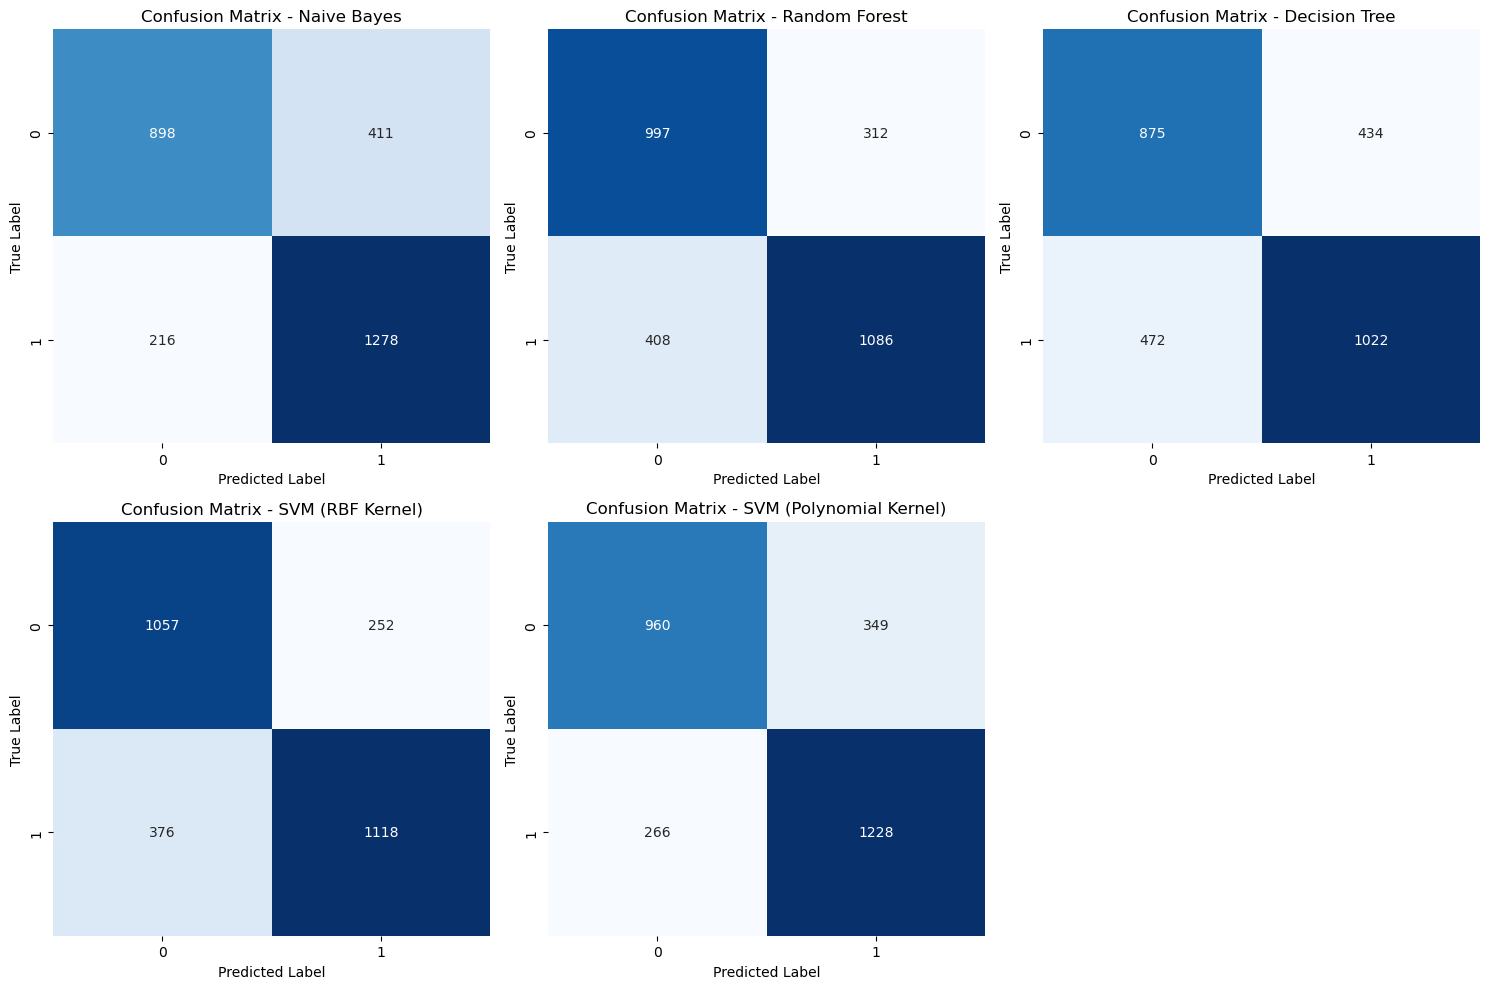

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for all models
conf_matrices = {
    'Naive Bayes': confusion_matrix(y_test, y_pred),
    'Random Forest': confusion_matrix(y_test, rf_y_pred),
    'Decision Tree': confusion_matrix(y_test, dt_y_pred),
    'SVM (RBF Kernel)': confusion_matrix(y_test, svm_y_pred_rbf),
    'SVM (Polynomial Kernel)': confusion_matrix(y_test, svm_y_pred_poly)
}

# Plot confusion matrices
plt.figure(figsize=(15, 10))
for idx, (model, conf_matrix) in enumerate(conf_matrices.items(), 1):
    plt.subplot(2, 3, idx)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()


## 6. Evaluation

In [110]:
from sklearn.metrics import confusion_matrix

# Function to calculate accuracy from confusion matrix
def calculate_accuracy(conf_matrix):
    # Sum of diagonal elements (true positives)
    correct_predictions = np.trace(conf_matrix)
    # Total number of instances
    total_predictions = np.sum(conf_matrix)
    # Calculate accuracy
    accuracy = correct_predictions / total_predictions
    return accuracy

# Calculate accuracy for Naive Bayes model
nb_conf_matrix = confusion_matrix(y_test, y_pred)
nb_accuracy = calculate_accuracy(nb_conf_matrix)
print("Naive Bayes Model Accuracy:", nb_accuracy)

# Calculate accuracy for Random Forest model
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_accuracy = calculate_accuracy(rf_conf_matrix)
print("Random Forest Model Accuracy:", rf_accuracy)

# Calculate accuracy for Decision Tree model
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_accuracy = calculate_accuracy(dt_conf_matrix)
print("Decision Tree Model Accuracy:", dt_accuracy)

# Calculate accuracy for SVM model with RBF kernel
svm_rbf_conf_matrix = confusion_matrix(y_test, svm_y_pred_rbf)
svm_rbf_accuracy = calculate_accuracy(svm_rbf_conf_matrix)
print("SVM Model with RBF Kernel Accuracy:", svm_rbf_accuracy)

# Calculate accuracy for SVM model with Polynomial kernel
svm_poly_conf_matrix = confusion_matrix(y_test, svm_y_pred_poly)
svm_poly_accuracy = calculate_accuracy(svm_poly_conf_matrix)
print("SVM Model with Polynomial Kernel Accuracy:", svm_poly_accuracy)


Naive Bayes Model Accuracy: 0.7763110952550838
Random Forest Model Accuracy: 0.7431323581876561
Decision Tree Model Accuracy: 0.6767748840528006
SVM Model with RBF Kernel Accuracy: 0.7759543346414556
SVM Model with Polynomial Kernel Accuracy: 0.7805922226186229


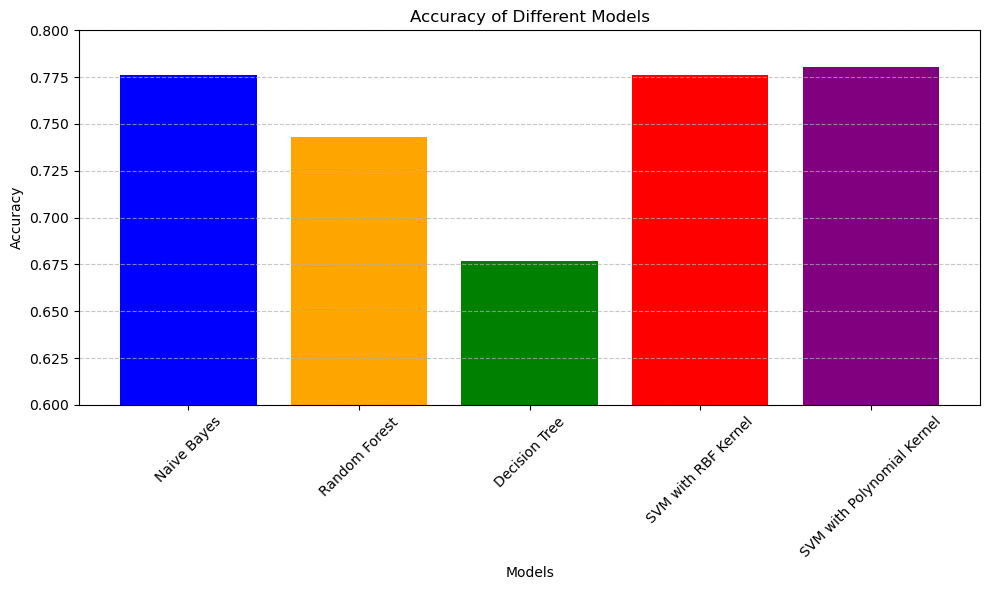

In [111]:
import matplotlib.pyplot as plt

# Models and their accuracies
models = ['Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM with RBF Kernel', 'SVM with Polynomial Kernel']
accuracies = [0.7763110952550838, 0.7431323581876561, 0.6767748840528006, 0.7759543346414556, 0.7805922226186229]

# Plotting the column graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.6, 0.8)  # Set y-axis limit
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


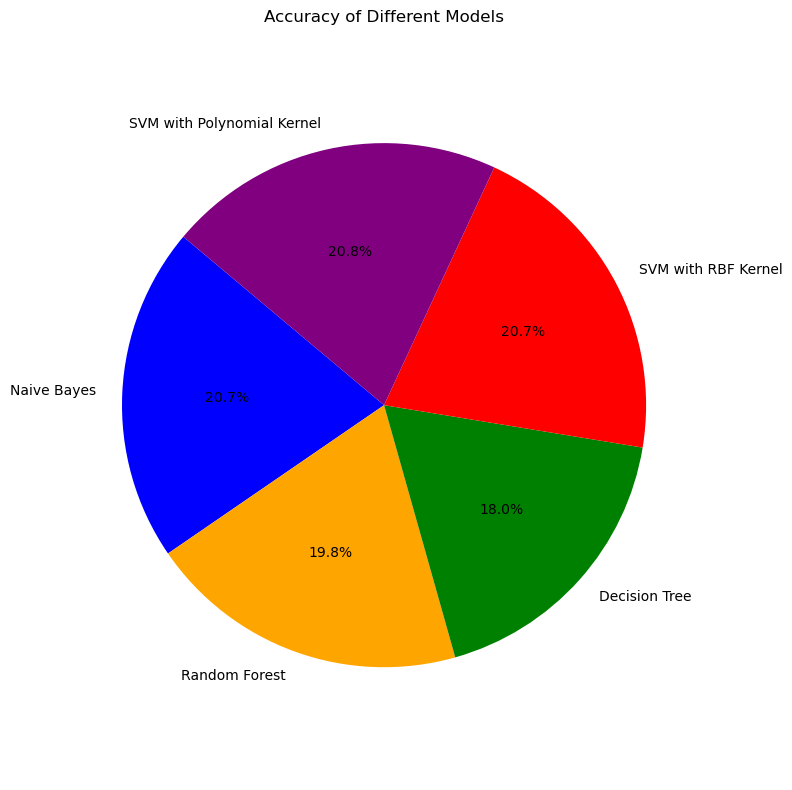

In [119]:
import matplotlib.pyplot as plt

# Models and their accuracies
models = ['Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM with RBF Kernel', 'SVM with Polynomial Kernel']
accuracies = [0.7763110952550838, 0.7431323581876561, 0.6767748840528006, 0.7759543346414556, 0.7805922226186229]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Accuracy of Different Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


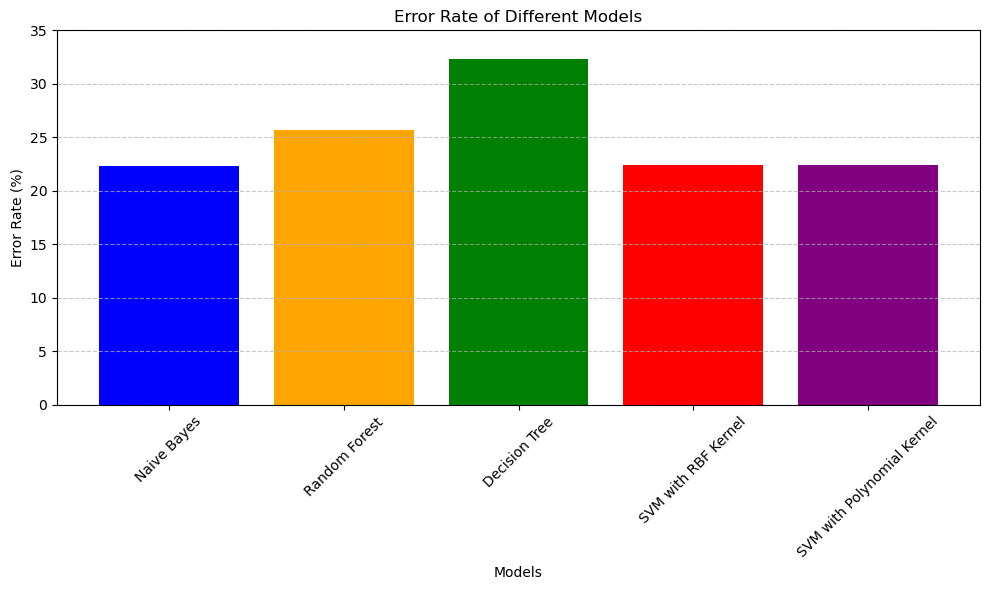

In [120]:
import matplotlib.pyplot as plt

# Models and their error rates
models = ['Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM with RBF Kernel', 'SVM with Polynomial Kernel']
error_rates = [22.36889047449162, 25.686764181234388, 32.32251159471994, 22.404566535854443, 22.404566535854443]

# Plotting the column graph
plt.figure(figsize=(10, 6))
plt.bar(models, error_rates, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Error Rate (%)')
plt.title('Error Rate of Different Models')
plt.ylim(0, 35)  # Set y-axis limit
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


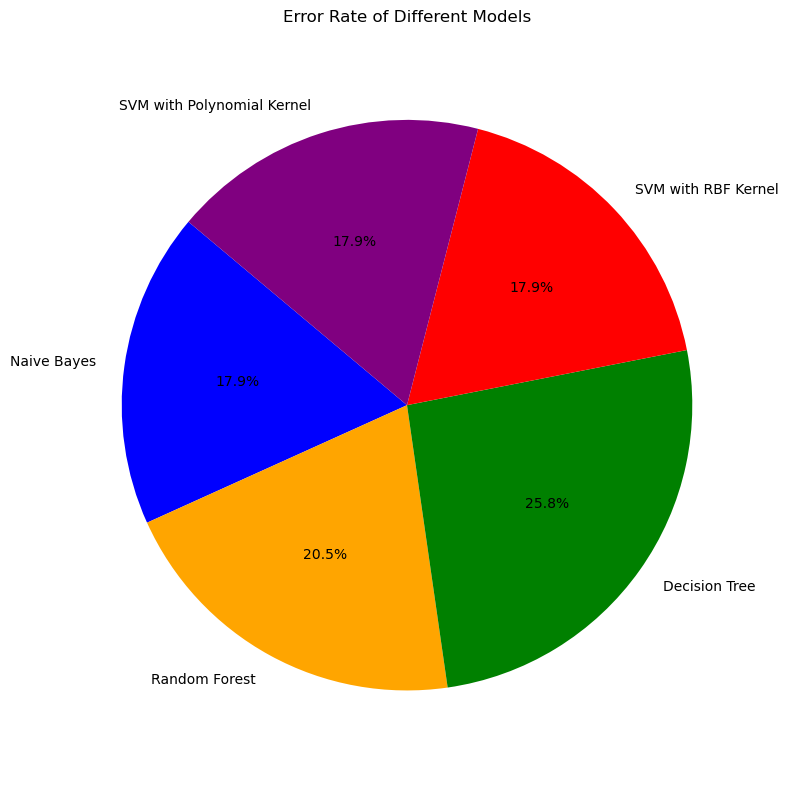

In [121]:
import matplotlib.pyplot as plt

# Models and their error rates
models = ['Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM with RBF Kernel', 'SVM with Polynomial Kernel']
error_rates = [22.36889047449162, 25.686764181234388, 32.32251159471994, 22.404566535854443, 22.404566535854443]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(error_rates, labels=models, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Error Rate of Different Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


## 7. Results

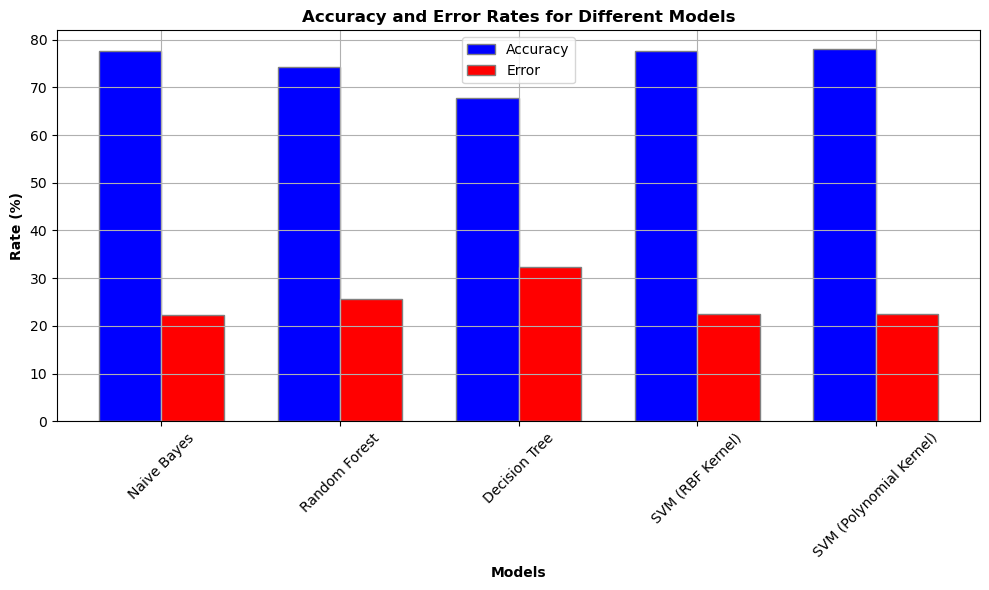

In [122]:
import matplotlib.pyplot as plt

# Models
models = ['Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM (RBF Kernel)', 'SVM (Polynomial Kernel)']

# Accuracy rates
accuracy_rates = [77.63, 74.31, 67.68, 77.60, 78.06]  # In percentage

# Error rates
error_rates = [22.37, 25.69, 32.32, 22.40, 22.40]  # In percentage

# Width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Create grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_rates, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, error_rates, color='r', width=bar_width, edgecolor='grey', label='Error')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Rate (%)', fontweight='bold')
plt.title('Accuracy and Error Rates for Different Models', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, rotation=45)
plt.legend()

# Add grid background
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


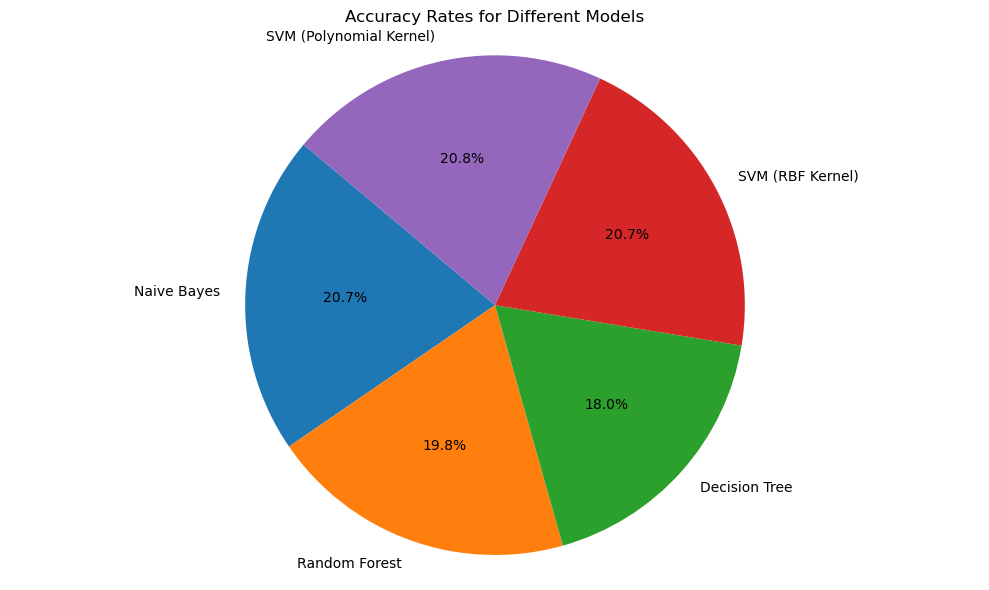

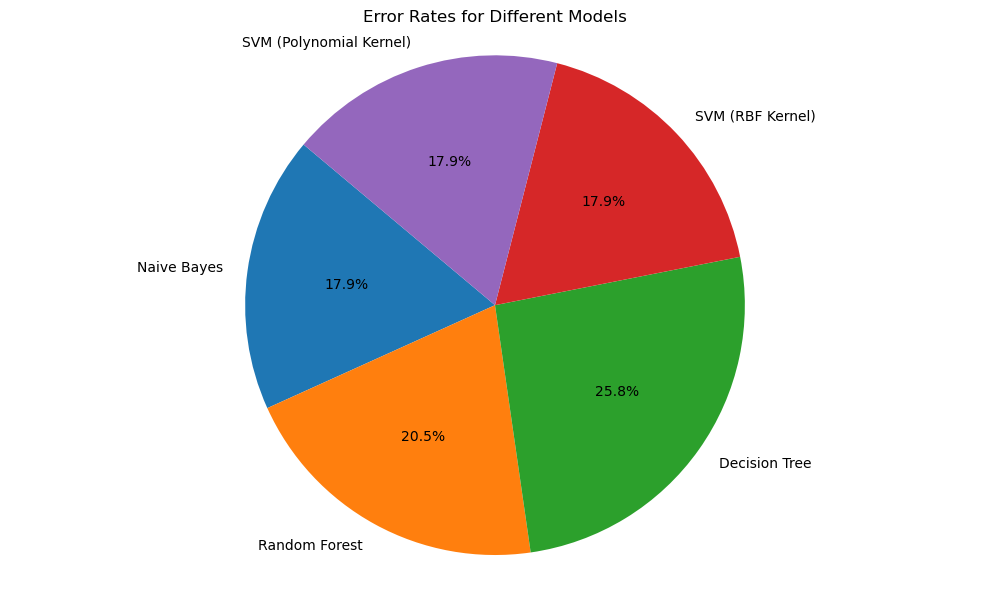

In [123]:
import matplotlib.pyplot as plt

# Models
models = ['Naive Bayes', 'Random Forest', 'Decision Tree', 'SVM (RBF Kernel)', 'SVM (Polynomial Kernel)']

# Accuracy rates
accuracy_rates = [77.63, 74.31, 67.68, 77.60, 78.06]  # In percentage

# Error rates
error_rates = [22.37, 25.69, 32.32, 22.40, 22.40]  # In percentage

# Plotting the pie chart for accuracy rates
plt.figure(figsize=(10, 6))
plt.pie(accuracy_rates, labels=models, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy Rates for Different Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# Plotting the pie chart for error rates
plt.figure(figsize=(10, 6))
plt.pie(error_rates, labels=models, autopct='%1.1f%%', startangle=140)
plt.title('Error Rates for Different Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [125]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [128]:
import pandas as pd

# Error rates data
error_results = [
    ("Naive Bayes", 22.37),
    ("Random Forest", 25.69),
    ("Decision Tree", 32.32),
    ("SVM with RBF Kernel", 22.40),
    ("SVM with Polynomial Kernel", 22.40)
]

# Print table
print(tabulate(error_results, headers=["Model", "Error Rate"]))


Model                         Error Rate
--------------------------  ------------
Naive Bayes                        22.37
Random Forest                      25.69
Decision Tree                      32.32
SVM with RBF Kernel                22.4
SVM with Polynomial Kernel         22.4


In [129]:
from tabulate import tabulate

# Accuracy results
accuracy_results = [
    ("Naive Bayes", 77.63),
    ("Random Forest", 74.31),
    ("Decision Tree", 67.68),
    ("SVM with RBF Kernel", 77.60),
    ("SVM with Polynomial Kernel", 78.06)
]

# Print table
print(tabulate(accuracy_results, headers=["Model", "Accuracy"]))

Model                         Accuracy
--------------------------  ----------
Naive Bayes                      77.63
Random Forest                    74.31
Decision Tree                    67.68
SVM with RBF Kernel              77.6
SVM with Polynomial Kernel       78.06
